<a href="https://colab.research.google.com/github/wbandabarragan/EPIC_3/blob/main/Day_1/MonteCarloMethods/1-MonteCarlo-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo methods

They are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results.


The underlying concept is to use randomness to solve problems that might be deterministic in principle.


They are often used in physical and mathematical problems and are most useful when it is difficult or impossible to use other approaches.


Monte Carlo methods are mainly used in three problem classes:

- optimization

- numerical integration

- generating draws from a probability distribution.

## Applications in physics:

In physics-related problems, Monte Carlo methods are useful for simulating systems with many coupled degrees of freedom:

- Fluids

- Disordered materials

- Strongly coupled solids

- Cellular structures

## Monte Carlo approach:

The (general) method consists of the following steps:

1. Define a domain of possible inputs.

2. Generate inputs randomly from a probability distribution over the domain.

3. Perform a deterministic computation on the inputs

4. Aggregate the results

## A canonical example:

For example, consider a circle inscribed in a unit square ($r=1$)

Given that the ratio of their areas is $\pi/4$, the value of $\pi$ can be approximated using a Monte Carlo method:

1. Draw a square, then inscribe a circle within it.


2. Uniformly scatter a given number of points over the square.


3. Count the number of points inside the circle, i.e. having a distance from the origin of less than $r=1$.


4. The ratio of the inside-count and the total-sample-count is an estimate of the ratio of the two areas. Aggregating the results yields our final result, the approximation of $\pi$.


$$\pi =\frac{A_{\rm circle}}{A_{\rm square}}$$

The areas are proportional to the number of points.

### 1. Draw a square, then inscribe a circle within it.

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fix the radius of the circle

rad_circle = 1.

In [3]:
# We need x and y coordinates

x_circle = np.linspace(0, rad_circle, 1000, endpoint = True)

y_circle = np.sqrt(rad_circle**2 - x_circle**2)

#print(x_circle.shape, y_circle.shape)

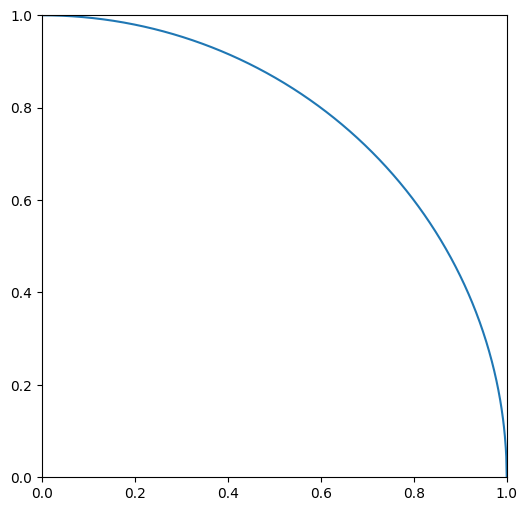

In [4]:
# Plotting the circle

plt.figure(figsize = (6,6))

plt.plot(x_circle, y_circle)

plt.xlim(0,1)
plt.ylim(0,1)

plt.show()

### 2. Uniformly scatter a given number of points over the square

In [5]:
# Define the number of points to scatter

number_points = 20

In [6]:
# Import random(), which provides numbers between 0 and 1

from random import random, randint

In [7]:
# Example

#print(random())

In [8]:
# Function to generate points randomly in the domain

def add_points(rad_circle):
    """
    This function generates points randomly in the domain.
    Inputs: rad_circle
    Outputs: points_x, points_y coordinates
    """
    points_x = random()*rad_circle
    points_y = random()*rad_circle

    return points_x, points_y

In [9]:
#print(add_points(rad_circle))

In [10]:
# Empty lists of coordinates to be filled up
dots_x = []
dots_y = []

for j in range(number_points):

    dots_x.append(add_points(rad_circle)[0])
    dots_y.append(add_points(rad_circle)[1])

#print(len(dots_x), len(dots_y))

dots_x = np.array(dots_x)
dots_y = np.array(dots_y)

#print(dots_y.shape)

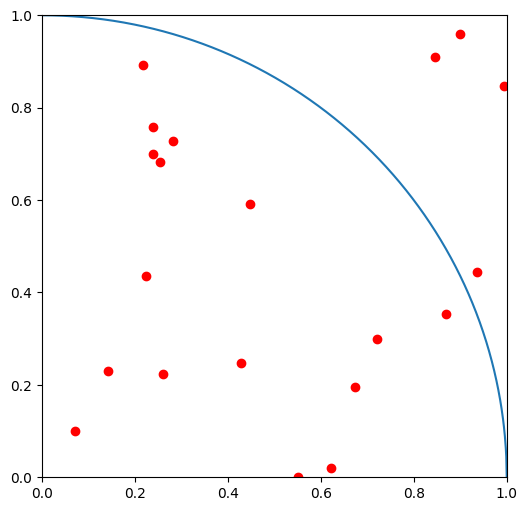

In [11]:
# Plotting

plt.figure(figsize = (6,6))

plt.plot(x_circle, y_circle)
plt.scatter(dots_x, dots_y, color = 'red')

plt.xlim(0,1)
plt.ylim(0,1)

plt.show()

### 3. Count the number of points inside the circle


This can be done by having a distance from the origin of less than $r=1$.

In [12]:
# Moduli of the dots

mod_dots = np.sqrt(dots_x**2 + dots_y**2)

In [13]:
# Doouble check numbers

#print(dots_x[9], dots_y[9], mod_dots[9])

In [14]:
# Conditionals using indexing:

# For dots inside the circle:
dots_inside_x = dots_x[np.where(mod_dots <= rad_circle)]
dots_inside_y = dots_y[np.where(mod_dots <= rad_circle)]

# For dots outside the circle:
dots_outside_x = dots_x[np.where(mod_dots > rad_circle)]
dots_outside_y = dots_y[np.where(mod_dots > rad_circle)]

#print(dots_outside_x, dots_outside_y)

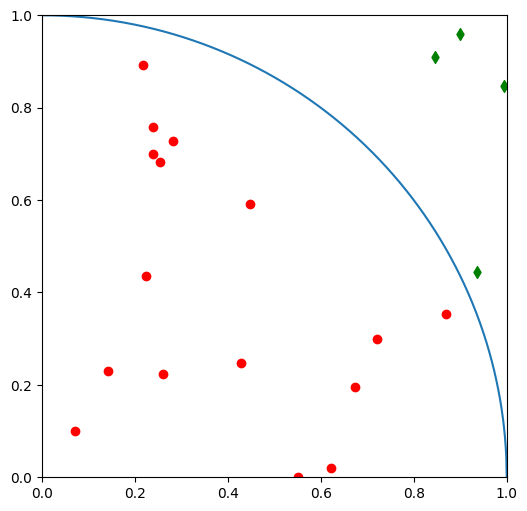

In [15]:
# Plotting the coloured points
plt.figure(figsize = (6,6))
plt.plot(x_circle, y_circle)
plt.scatter(dots_inside_x, dots_inside_y, color = 'red')
plt.scatter(dots_outside_x, dots_outside_y, color = 'green', marker = 'd')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

### 4. The ratio of the inside-count and the total-sample-count is an estimate of the ratio of the two areas. Aggregating the results yields our final result, the approximation of $\pi$.


$\pi =\frac{A_{\rm circle}}{A_{\rm square}}= 4\frac{points_{circle}}{total_{points}}$

The areas are proportional to the number of points.

In [16]:
# Calculate areas inside and outside

area_circle = len(dots_inside_x)
area_total = len(dots_inside_x) + len(dots_outside_x)

#print(area_circle, area_total)

In [17]:
# Now we print PI:

number_pi = 4*area_circle/area_total

print("Our Monte Carlo simulation indicates that PI is:", number_pi)

Our Monte Carlo simulation indicates that PI is: 3.2


### Show convergence:

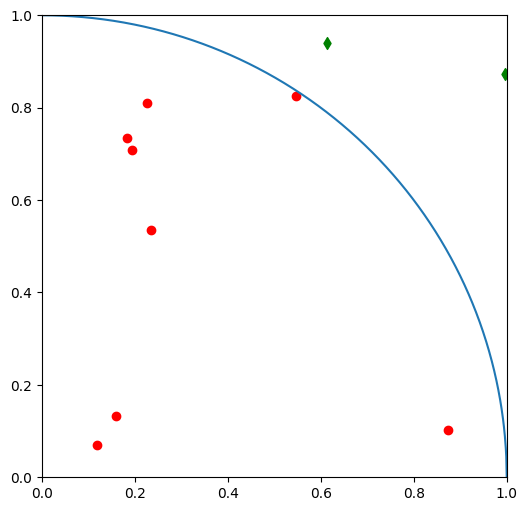

Our Monte Carlo simulation indicates that PI is: 3.2


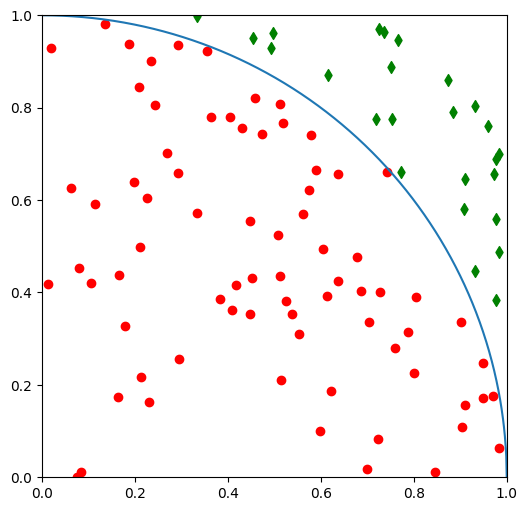

Our Monte Carlo simulation indicates that PI is: 3.0


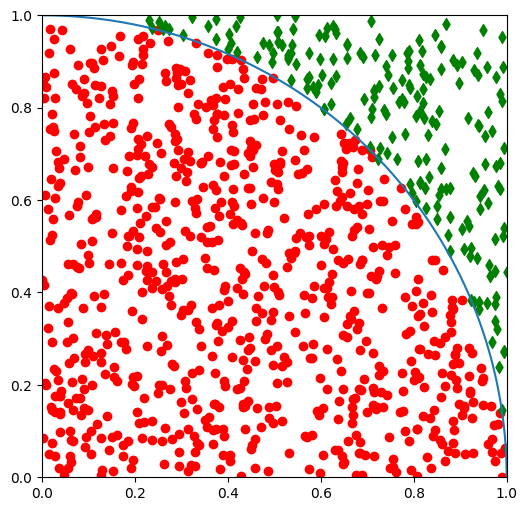

Our Monte Carlo simulation indicates that PI is: 3.196


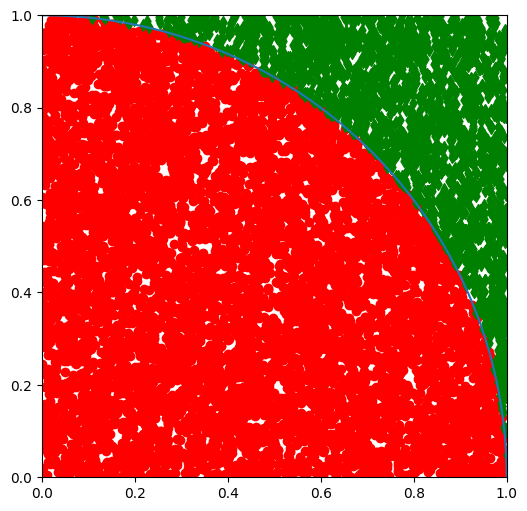

Our Monte Carlo simulation indicates that PI is: 3.1424


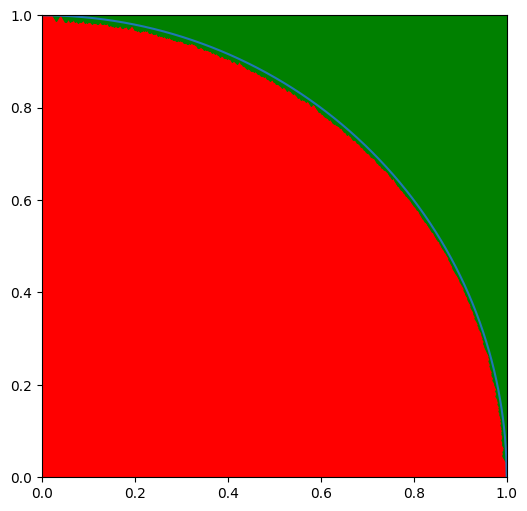

Our Monte Carlo simulation indicates that PI is: 3.14636


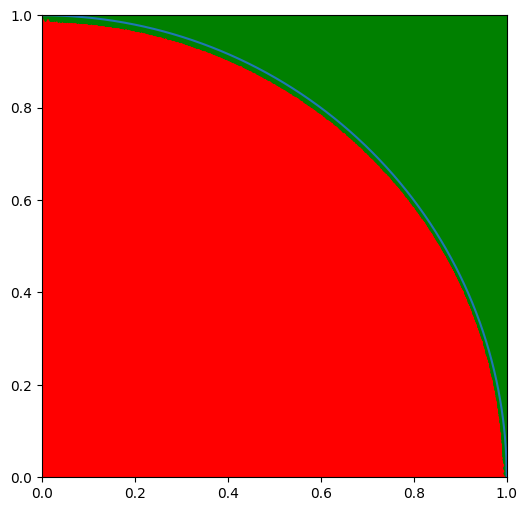

Our Monte Carlo simulation indicates that PI is: 3.140964


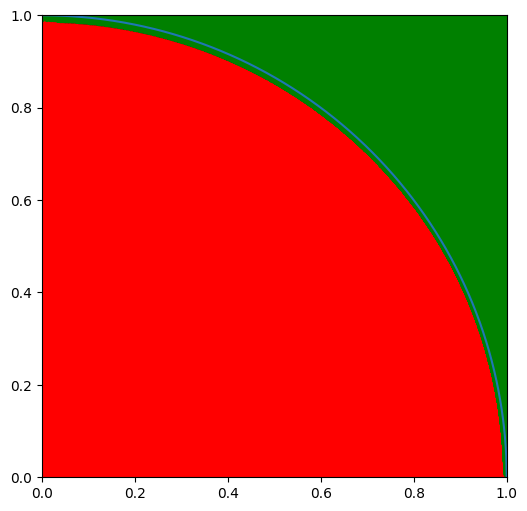

Our Monte Carlo simulation indicates that PI is: 3.1408516


In [18]:
# Iterate for different values of number_points

number_points = 8

pi_numbers = []
kk_numbers = []

for k in range(1, number_points):

    # Empty lists of coord. to filled up
    dots_x = []
    dots_y = []

    for j in range(10**k):
        dots_x.append(add_points(rad_circle)[0])
        dots_y.append(add_points(rad_circle)[1])

    #print(len(dots_x), len(dots_y))

    dots_x = np.array(dots_x)
    dots_y = np.array(dots_y)

    # Moduli of the dots

    mod_dots = np.sqrt(dots_x**2 + dots_y**2)

    # Conditionals:

    # For dots inside the circle:
    dots_inside_x = dots_x[np.where(mod_dots <= rad_circle)]
    dots_inside_y = dots_y[np.where(mod_dots <= rad_circle)]

    # For dots outside the circle:
    dots_outside_x = dots_x[np.where(mod_dots > rad_circle)]
    dots_outside_y = dots_y[np.where(mod_dots > rad_circle)]

    plt.figure(figsize = (6,6))
    plt.plot(x_circle, y_circle)
    plt.scatter(dots_inside_x, dots_inside_y, color = 'red')
    plt.scatter(dots_outside_x, dots_outside_y, color = 'green', marker = 'd')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

    #Areas
    area_circle = len(dots_inside_x)
    area_total = len(dots_inside_x) + len(dots_outside_x)

    #print(area_circle, area_total)

    # Now we print PI:

    number_pi = 4*area_circle/area_total

    print("Our Monte Carlo simulation indicates that PI is:", number_pi)

    pi_numbers.append(number_pi)
    kk_numbers.append(10**k)

In [22]:
#print(kk_numbers)

#print(pi_numbers)


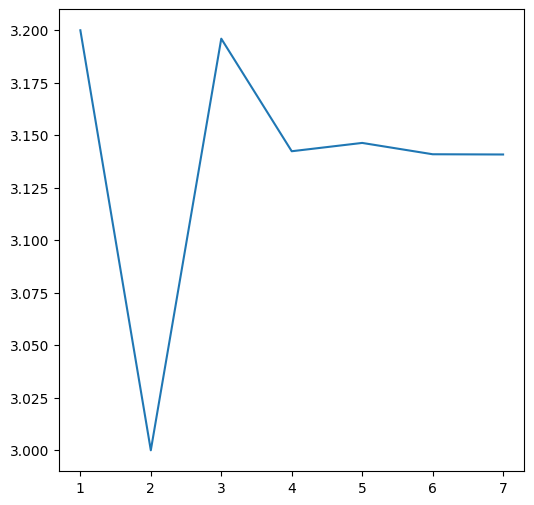

In [23]:
plt.figure(figsize =(6,6))

plt.plot(np.log10(kk_numbers), pi_numbers)

plt.show()